## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [91]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [92]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [94]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [95]:
df.group.value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [96]:
df.landing_page.value_counts()

new_page    147239
old_page    147239
Name: landing_page, dtype: int64

b. Use the below cell to find the number of rows in the dataset.

In [97]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [98]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [99]:
len(df[df['converted']== 1])/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [100]:
df.query ('group == "treatment" and landing_page != "new_page"').shape[0]

1965

f. The number of times the `old_page` and `control` don't line up.

In [101]:
df.query ('group == "control" and landing_page != "old_page"').shape[0]

1928

g. Do any of the rows have missing values?

In [102]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [103]:
df2 = df[((df.group=='treatment') & (df.landing_page=='new_page')) | ((df.group=='control') & (df.landing_page=='old_page'))]

In [104]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [105]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [106]:
len(df2[df2['user_id'].duplicated()])

1

c. What is the row information for the repeat **user_id**? 

In [107]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [108]:
df2 = df2.drop_duplicates(subset='user_id');

In [109]:
df2.shape

(290584, 5)

In [110]:
sum(df2.duplicated())

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [111]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [112]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [113]:
df2[df2['group']=="treatment"].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [114]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:**  Based on the output above, it looks like that the control group has a slightly higher conversion rate (0.1204) than the treatment group (0.1195), however, these results don't provide a solid evidence that the old page leads to more conversions than the new one as we still don't know the significance of these results

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$ H_0 : \mu_{p_{new}}- \mu_{p_{old}}<= 0$$


$$H_1 : \mu_{p_{old}}- \mu_{p_{new}} > 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [115]:
df2 = df2.sample(290584)

a. What is the **convert rate** for $p_{new}$ under the null? 

In [116]:
#the Null hypothesis where there is no difference in conversion based on the page, 
#which means the conversions for each page are the same. 
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [117]:
#the Null hypothesis states there is not difference between the conversion rates of old and new page.
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [118]:
n_new = df2.query('landing_page=="new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [119]:
n_old = df2.query('landing_page=="old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [120]:
new_page_converted = np.random.choice([0, 1], n_new, p = [p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [121]:
old_page_converted = np.random.choice([0, 1], n_old, p = [p_old, 1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [122]:
new_page_converted.mean() - old_page_converted.mean()

0.0009036789397807166

Actual difference observed in ab_data.csv

In [123]:
ab_data_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
ab_data_diff

-0.0015782389853555567

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [124]:
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new 
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old 
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

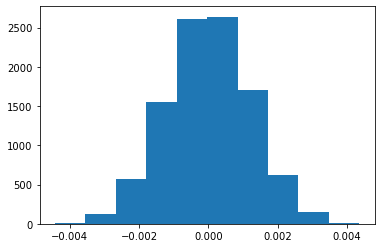

In [125]:
plt.hist(p_diffs);

In [126]:
#create a random sample for the null values
null_vals=np.random.normal(0,np.std(p_diffs),10000)

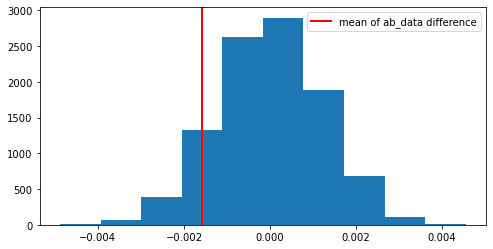

In [127]:
plt.figure(figsize=(8, 4))
plt.hist(null_vals);
plt.axvline(ab_data_diff,color='r',linewidth=2,label='mean of ab_data difference');
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [128]:
#Calculate the P-value
(null_vals > ab_data_diff).mean()

0.9043

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**
*This value represents the p-value which is the probability of observing the statistic given the Null is true. As the p-value is large enough, we would fail to reject the Null hypothesis and so we will keep the old page.*

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [129]:
import statsmodels.api as sm
import scipy.stats as st
convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))
convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value. 

**link:**( https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html.

In [130]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

In [131]:
z_critical=st.norm.ppf(.95)
z_critical

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
**Answer:** 

1) We have here z_score = 1.310924 which is less than the z_critical of(1.6448536),then we fail to reject null hypothesis. Therefore the conclusion is same as above in j and k that we accept null hypothesis.

2) We have here p-value which is greater than alpha of 5%,then we fail to reject null hypothesis

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
**Answer:** We have here two categorical outcomes a Yes-No type of variable (converted), the appropriate approach is Logistic Regression.

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [132]:
# create dummy variables from the group column
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
# drop the baseline treatment column
df2 = df2.drop('control', 1)
# create intercept column
df2['intercept'] = 1
# check to make sure the columns are added and to compare with old df2
# dataframe above
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
64909,844188,2017-01-14 11:11:21.311466,control,old_page,0,0,1
292886,722386,2017-01-13 11:06:23.153283,treatment,new_page,0,1,1
47463,791402,2017-01-18 08:18:04.735452,control,old_page,0,0,1
88568,921441,2017-01-10 15:31:07.040223,control,old_page,0,0,1
39343,654631,2017-01-07 06:53:41.494598,control,old_page,0,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

### Model 1

In [135]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [134]:
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:               8.077e-06
Time:                        17:45:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
**Answer:  The p-value = 0.190** ,  because of the type of test. As can be seen by the formulated hypotheses, in Part II we had a one-tailed test whereas in Part III a two tailed test.

As we can saw in **part II**  we have hypothesis of : We performed a one-sided test

$$ H_0 : \mu_{p_{new}}- \mu_{p_{old}}<= 0$$


$$H_1 : \mu_{p_{new}}- \mu_{p_{old}} > 0$$

While in **part III** we have hypothesis of :

$$ H_0 : \mu_{p_{new}}- \mu_{p_{old}}= 0$$


$$H_1 : \mu_{p_{new}}- \mu_{p_{old}} ≠ 0$$

The p-value here suggests that the group variable of (treatment and control) is not statistically significant enough in predicting of the conversion also tend to fail rejecting the null hypothesis as p-value is greater than aplha 

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
**Answer:** Considering other things that might influence an individual converts is a good idea as these factors may contribute to the significance of our test results and leads to more accurate decisions .

**Disadvantages**
1. Additional terms will always improve the model whether the new term adds significant value to the model or not. As a matter of fact, adding new variables can actually make the model worse. Adding more and more variables makes it more and more likely that you will overfit your model to the training data.

2. Adding more independent variables or predictors to a regression model tends to increase the R-squared value, which tempts makers of the model to add even more variables. This is called overfitting and can return an unwarranted high R-squared value.

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [149]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [150]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [151]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [158]:
### Create the necessary dummy variables
df_new[['US', 'UK','CA']] = pd.get_dummies(df_new['country'])[['US', 'UK','CA']]
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


### Model 2

In [171]:
log_mod2 = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US']])

In [172]:
results2 = log_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:               2.323e-05
Time:                        21:03:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [164]:
### Fit Your Linear Model And Obtain the Results
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']

### Model 3

In [166]:
results3=sm.Logit(df_new['converted'], df_new[['intercept','ab_page','UK','US','US_ab_page','UK_ab_page']]).fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:               3.482e-05
Time:                        20:08:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

### Model 4

In [173]:
results4=sm.Logit(df_new['converted'], df_new[['intercept','UK','US']]).fit()
results4.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:               1.521e-05
Time:                        21:06:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

 None of the variables have significant p-values. Therefore, we will fail to reject the null and conclude that there is not sufficient evidence to suggest that there is an interaction between country and page received that have statistically signinficant effect on predict whether a user converts or not.

<a id='conclusions'></a>
## Conclusions

##### At last, We have done two parts of analysis :
**Part II**

We have done test on the the type of page that the user converts where the hypothesis is:

$$ H_0 : \mu_{p_{new}}- \mu_{p_{old}}<= 0$$


$$H_1 : \mu_{p_{new}}- \mu_{p_{old}} > 0$$

And we have make a 3 ways to know whether to reject or accept null hypothesis 

1. The sample mean lies on the null hypothesis distribution which let us  fail to reject the null hypothesis 
2. Also, We have calculated the p-value which is equal to 0.9043 that is very high value compared to 0.05 (error)
3. We have calculated the z-score here and z-critical and we have conclude that z-score is less than the z-critical (1.310924 < 1.6448536) that will force us to accept our null hypothesis 

So, this part we have concluded that the type of page has no effect on what the user converts


**Part III**

We have confirmed the part II using Logistic regression but with different hypothesis :

$$ H_0 : \mu_{p_{new}}- \mu_{p_{old}}= 0$$


$$H_1 : \mu_{p_{new}}- \mu_{p_{old}} ≠ 0$$

Where our p-value in:
1. the first model that see the effect of group on conversion is 0.190 which is greater than alpha, then we will also fail to reject the the null hypothesis as analysis on part II
2. the second model that see the effect of country with page type on what the user converts, But also find that all p-value are greater than the alpha which confirm that country and page type has no significance 
3. the third model that see the effect of interation of country with page type and page type on what the user converts , But also find that all p-value are greater than the alpha 
4. the fourth model that see the effect of country only on what the user converts,but sadly all p-value are greater than the alpha

At last all of the p-values of four models is confirming that country or page type have no statistically significance on predicting if the user will convert or not